In [1]:

from __future__ import division, print_function, unicode_literals
mport sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os 


np.random.seed(42) 


%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [245]:
# read data
df =  pd.read_excel('C:\\Users\\lenovo\\Desktop\\Trainingset\\kmeans\\MAJORP-kmeans.xlsx')
df.head()

SIO2(WT%)  TIO2(WT%)  AL2O3(WT%)  CR2O3(WT%)  FEOT(WT%)  CAO(WT%)  \
0    56.8936     0.1562      1.1323      0.2907     4.1638   10.3172   
1    50.0600     0.5000     10.6300      0.5100     6.0000   10.5400   
2    51.2800     0.3836      5.1700      0.0185    11.0200   10.6850   
3    52.0600     0.1100      0.8900      0.2900    10.6900   11.1900   
4    52.5000     0.6370      5.7600      0.0224    11.4000   11.2800   

   MGO(WT%)  MNO(WT%)  NA2O(WT%) Metasomatism label  
0   28.5274   0.12470     0.2786                  U  
1   18.6300   0.09000     1.7200                  U  
2   18.9100   0.12545     1.5227                  U  
3   22.0100   0.33000     0.5700                  U  
4   18.2100   0.14020     1.6400                  U

In [246]:
# check the missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21605 entries, 0 to 21604
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SIO2(WT%)           21605 non-null  float64
 1   TIO2(WT%)           21605 non-null  float64
 2   AL2O3(WT%)          21605 non-null  float64
 3   CR2O3(WT%)          21605 non-null  float64
 4   FEOT(WT%)           21605 non-null  float64
 5   CAO(WT%)            21605 non-null  float64
 6   MGO(WT%)            21605 non-null  float64
 7   MNO(WT%)            21605 non-null  float64
 8   NA2O(WT%)           21605 non-null  float64
 9   Metasomatism label  21605 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [248]:
# Separate true labels from features
data = df.drop('Metasomatism label', axis=1)
labels = df['Metasomatism label'].copy()
np.unique(labels)

array(['L', 'U'], dtype=object)

In [249]:
#labels

In [250]:
# Obtain the number of samples and the number of features
n_samples, n_features = data.shape
# Obtain the number of labels
n_labels = len(np.unique(labels))

In [251]:
np.unique(labels)

array(['L', 'U'], dtype=object)

In [252]:
labels.value_counts()

U    19516
L     2089
Name: Metasomatism label, dtype: int64

# KMeans Algorithm Clustering

In [229]:
from sklearn import metrics

def get_marks(estimator, data, name=None, kmeans=None, af=None):
 """
    Get the score. There are five types of information that need to know the true classification information of the dataset, and three types that don't need. Refer to readme.txt for details
    For Kmeans, use Silhouette Score generally 
    
    :param estimator: Model
    :param name: Initialisation method
    :param data: Feature dataset
    """
    estimator.fit(data)
    print(20 * '*', name, 20 * '*')
    if kmeans:
        print("Mean Inertia Score: ", estimator.inertia_)
    elif af:
        cluster_centers_indices = estimator.cluster_centers_indices_
        print("The estimated number of clusters: ", len(cluster_centers_indices))
    print("Homogeneity Score: ", metrics.homogeneity_score(labels, estimator.labels_))
    print("Completeness Score: ", metrics.completeness_score(labels, estimator.labels_))
    print("V Measure Score: ", metrics.v_measure_score(labels, estimator.labels_))
    print("Adjusted Rand Score: ", metrics.adjusted_rand_score(labels, estimator.labels_))
    print("Adjusted Mutual Info Score: ", metrics.adjusted_mutual_info_score(labels, estimator.labels_))
    print("Calinski Harabasz Score: ", metrics.calinski_harabasz_score(data, estimator.labels_))
    print("Silhouette Score: ", metrics.silhouette_score(data, estimator.labels_))

In [230]:
from sklearn.cluster import KMeans

# Use K-Means for clustering, set cluster=2, and set different initialization methods ('k-means++' and'random')
km1 = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
km2 = KMeans(init='random', n_clusters=5, n_init=10, random_state=42)
print("n_labels: %d \t n_samples: %d \t n_features: %d" % (n_labels, n_samples, n_features))
get_marks(km1, data, name="k-means++", kmeans=True)
get_marks(km2, data, name="random", kmeans=True)

n_labels: 2 	 n_samples: 21605 	 n_features: 9
******************** k-means++ ********************
Mean Inertia Score:  158364.44187040319
Homogeneity Score:  0.031141253824474337
Completeness Score:  0.00661955235589306
V Measure Score:  0.010918260544259237
Adjusted Rand Score:  -0.01071093450242174
Adjusted Mutual Info Score:  0.01081715450808173
Calinski Harabasz Score:  9249.390449574275
Silhouette Score:  0.31873557285837334
******************** random ********************
Mean Inertia Score:  158364.75510676036
Homogeneity Score:  0.03135387686087247
Completeness Score:  0.006662051378082174
V Measure Score:  0.010989137881166098
Adjusted Rand Score:  -0.010758396489108379
Adjusted Mutual Info Score:  0.010888072998664688
Calinski Harabasz Score:  9249.364728710912
Silhouette Score:  0.31873936838796596


In [231]:
# The label of each sample after clustering
km1.labels_

array([1, 4, 1, ..., 4, 0, 0])

In [232]:
# Unique labels
np.unique(km2.labels_)

array([0, 1, 2, 3, 4])

In [233]:
# Write the clustering results into the original table
df['km_clustering_label'] = km1.labels_
# Export the table as csv format
df.to_csv('result.csv')

In [98]:
# Different from data, df is the original data set
df.head()

SC(PPM)  TI(PPM)  V(PPM)  CR(PPM)  NI(PPM)  RB(PPM)  SR(PPM)  Y(PPM)  \
0     79.0    899.0   190.0   7460.0    352.0      1.4    383.0     6.9   
1     59.0    540.0   246.0   8490.0    409.0      2.3    537.0    10.5   
2     49.0    120.0   127.0   8140.0    370.0      0.4    180.0     0.9   
3     57.0   2998.0   150.0  14580.0    277.0      0.0    258.0     9.3   
4     55.0    120.0   145.0   8830.0    343.0      0.0    281.0     2.9   

   ZR(PPM)  NB(PPM)  ...  TM(PPM)  YB(PPM)  LU(PPM)  HF(PPM)  TA(PPM)  \
0     52.0      0.9  ...     0.07     0.53     0.09     1.95     0.12   
1     89.0      2.8  ...     0.13     0.82     0.10     3.06     0.14   
2      2.0      1.3  ...     0.00     0.16     0.00     0.10     0.08   
3    152.0      0.8  ...     0.10     0.54     0.06     3.66     0.13   
4      9.0      0.7  ...     0.03     0.30     0.04     0.09     0.09   

   PB(PPM)  TH(PPM)  U(PPM)  Metasomatism label  km_clustering_label  
0     0.19     0.11    0.04                   U                    0  
1     0.32     0.45    0.21                   U                    0  
2     0.12     0.51    0.14                   U                    0  
3     0.50     0.06    0.02                   U                    4  
4     0.20     0.43    0.13                   U                    0  

[5 rows x 32 columns]

In [99]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to automatically find the best parameters, kmeans is used here as a classification model, not clustering
params = {'init':('k-means++', 'random'), 'n_clusters':[2, 3, 4, 5, 6], 'n_init':[5, 10, 15]}
cluster = KMeans(random_state=42)
# Use adjusted rand score (adjusted_rand_score) as the score. Refer to readme.txt for details
km_best_model = GridSearchCV(cluster, params, cv=3, scoring='adjusted_rand_score',
                             verbose=1, n_jobs=-1)
# Since external evaluation indicators are selected, the true classification information of the original dataset is needed.
km_best_model.fit(data, labels)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=KMeans(random_state=42), n_jobs=-1,
             param_grid={'init': ('k-means++', 'random'),
                         'n_clusters': [2, 3, 4, 5, 6], 'n_init': [5, 10, 15]},
             scoring='adjusted_rand_score', verbose=1)

In [100]:
# Parameters of the best model
km_best_model.best_params_

{'init': 'random', 'n_clusters': 4, 'n_init': 5}

In [101]:
# Scores of the best model
km_best_model.best_score_

0.01893979144216006

In [102]:
# Obtain the best model
km3 = km_best_model.best_estimator_
km3

KMeans(init='random', n_clusters=4, n_init=5, random_state=42)

In [103]:
# Obtain 8 scores of the best model，Refer to readme.txt for details
get_marks(km3, data, name="k-means++", kmeans=True)

******************** k-means++ ********************
Mean Inertia Score:  33544859778.389717
Homogeneity Score:  0.037652665157921324
Completeness Score:  0.03292928748971902
V Measure Score:  0.03513293098956986
Adjusted Rand Score:  0.006169918125210088
Adjusted Mutual Info Score:  0.034362874240489866
Calinski Harabasz Score:  2430.4358316699518
Silhouette Score:  0.5378221615350529


In [69]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt

def plot_scores(init, max_k, data, labels):
    '''
    Draw three scoring diagrams for different initialization methods of kmeans
    
    :param init: Initialization methods ('k-means++' and 'random')
    :param max_k: Maximum number of cluster centers
    :param data: Feature dataset
    :param labels: True labels dataset
    '''
    
    i = []
    inertia_scores = []
    y_silhouette_scores = []
    y_calinski_harabaz_scores = []
    
    for k in range(2, max_k):
        kmeans_model = KMeans(n_clusters=k, random_state=1, init=init, n_init=10)
        pred = kmeans_model.fit_predict(data)
        i.append(k)
        inertia_scores.append(kmeans_model.inertia_)
        y_silhouette_scores.append(silhouette_score(data, pred))
        y_calinski_harabaz_scores.append(calinski_harabasz_score(data, pred))
    
    new = [inertia_scores, y_silhouette_scores, y_calinski_harabaz_scores]
    for j in range(len(new)):
        plt.figure(j+1)
        plt.plot(i, new[j], 'bo-')
        plt.xlabel('n_clusters')
        if j == 0:
            name = 'inertia'
        elif j == 1:
            name = 'silhouette'
        else:
            name = 'calinski_harabasz'
        plt.ylabel('{}_scores'.format(name))
        plt.title('{}_scores with {} init'.format(name, init))

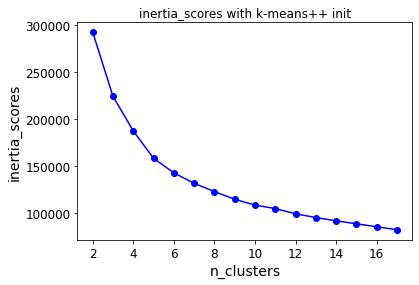

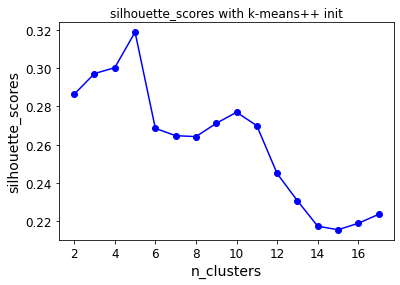

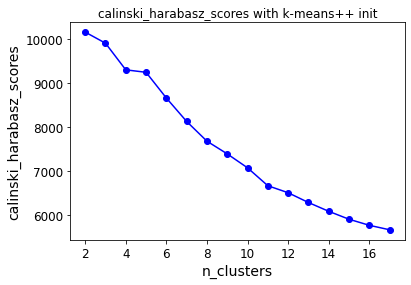

In [31]:
plot_scores('k-means++', 18, data, labels)

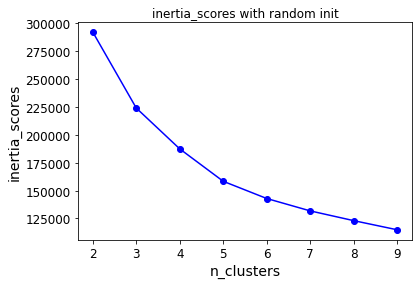

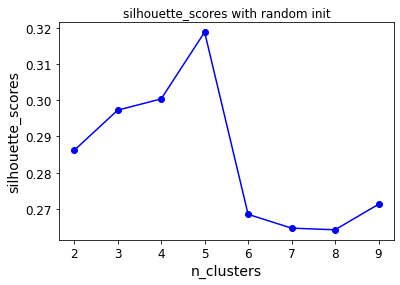

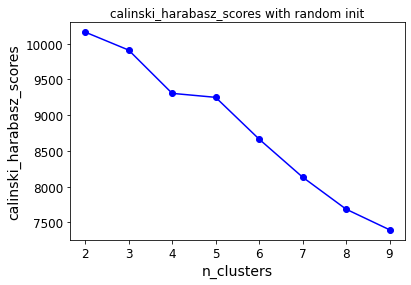

In [32]:
plot_scores('random', 10, data, labels)

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagram(clusterer, X, show_xlabels=True,
                            show_ylabels=True, show_title=True):
    """
    Plot silhouette diagram
    
    :param clusterer: Trained clustering model (here the number of clusters can be set in advance, you can slightly modify the code to replace it with one that cannot be set in advance)
    :param X: Feature-only dataset
    :param show_xlabels: If true, add abscissa information
    :param show_ylabels: If true, add ordinate information
    :param show_title: If true, add the figure name
    """
    
    y_pred = clusterer.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    silhouette_average = silhouette_score(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(clusterer.n_clusters):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i / clusterer.n_clusters)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    
    plt.axvline(x=silhouette_average, color="red", linestyle="--")
    
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(clusterer.n_clusters)))
    
    if show_xlabels:
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Cluster")
    if show_title:
        plt.title("init:{}  n_cluster:{}".format(clusterer.init, clusterer.n_clusters))

NameError: name 'km3' is not defined

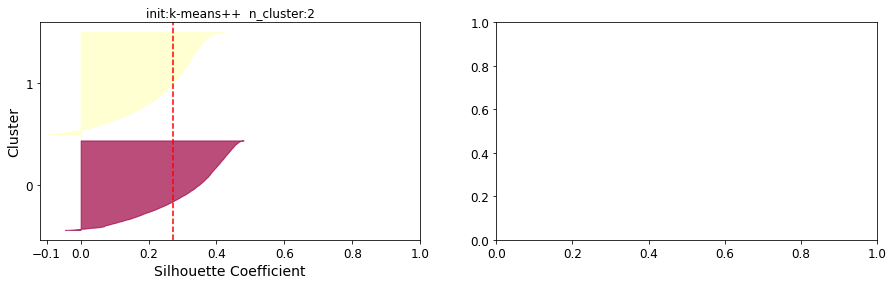

In [99]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
plot_silhouette_diagram(km1, data)
plt.subplot(122)
plot_silhouette_diagram(km3, data, show_ylabels=False)
save_fig("silhouette_diagram")

# MiniBatch KMeans

In [30]:
from sklearn.cluster import MiniBatchKMeans

In [31]:
# Test the running speed of KMeans algorithm
%timeit KMeans(n_clusters=3).fit(data)

94.7 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
# Test the running speed of MiniBatchKMeans algorithm
%timeit MiniBatchKMeans(n_clusters=5).fit(data)

29 ms ± 2.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r Training: {}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(data)", number=10, globals=globals())
    times[k-1, 1] = timeit("minibatch_kmeans.fit(data)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

 Training: 100/100

Saving figure minibatch_kmeans_vs_kmeans


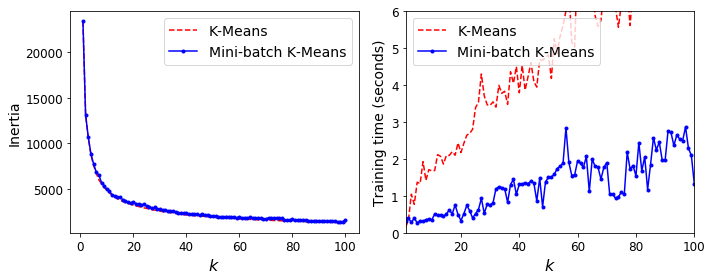

In [34]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Inertia", fontsize=14)
plt.legend(fontsize=14)

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])
plt.legend(fontsize=14)

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

# Clustering after dimensionality reduction

In [253]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# data need to be standardized before dimension reduction for dimensionless method#
#scaler = StandardScaler()
#data = pd.DataFrame(scaler.fit_transform(data))
# Use general PCA for dimension reduction, reducing features from 11 dimensions to 3 dimensions
pca1 = PCA(n_components=2) #n_labels
pca1.fit(data)

km4 = KMeans(init=pca1.components_, n_clusters=2, n_init=10)
get_marks(km4, data, name="PCA-based KMeans", kmeans=True)

d:\python\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


******************** PCA-based KMeans ********************
Mean Inertia Score:  292173.4657304109
Homogeneity Score:  0.0016398019224131873
Completeness Score:  0.0007537212678844557
V Measure Score:  0.0010327483678041491
Adjusted Rand Score:  0.0022219580271728026
Adjusted Mutual Info Score:  0.0009869120109409983
Calinski Harabasz Score:  10162.602390983133
Silhouette Score:  0.286130177845056


In [254]:
# The feature dimension of the training dataset is reduced to 2 dimensions
len(pca1.components_)

2

In [255]:
# Use general PCA to reduce dimension, reduce features to 2 dimensions, and visualize 2D planes
pca2 = PCA(n_components=2)
reduced_data = pca2.fit_transform(data)
# Use k-means for clustering, set cluster=3, and initialize the method as'k-means++'
kmeans1 = KMeans(init="k-means++", n_clusters=5, n_init=10)
kmeans2 = KMeans(init="random", n_clusters=5, n_init=10)
kmeans1.fit(reduced_data)
kmeans2.fit(reduced_data)

KMeans(init='random', n_clusters=5)

In [256]:
# The feature dimension of the training dataset is reduced to 2 dimensions
len(pca2.components_)

2

In [257]:
# The 2-dimensional eigenvalues (after dimensionality reduction)
reduced_data

array([[-10.08443073,   6.73868751],
       [  3.92565729,  10.21270885],
       [  2.16388856,   5.36324853],
       ...,
       [  3.96149347,  -1.61245588],
       [ -3.0185372 ,  -5.02001207],
       [ -0.22055311,  -4.05427594]])

In [258]:
# The coordinates of the 3 cluster centers
kmeans1.cluster_centers_

array([[-3.65579605,  1.19426911],
       [ 7.706522  ,  0.40954549],
       [ 0.98040529,  2.00228681],
       [ 2.87128964, -2.35495371],
       [-1.95405529, -1.48692773]])

In [269]:
from matplotlib.colors import ListedColormap

def plot_data(X, real_tag=True):
    """
    Draw a scatter plot
    
    :param X: Dataset containing eigenvalues only
    :param real_tag: If there is a value, color the scattered points with different categories
    """
#    try:
#        if not real_tag:
#            plt.plot(X[:, 0], X[:, 1], 'k.', markersize=1, alpha=0.2)
#    except ValueError:
#        types = list(np.unique(real_tag))
#        for i in range(len(types)):
    plt.plot(X[:, 0][real_tag=='U'], X[:, 1][real_tag=='U'],'.'
                 ,label="{}".format('U'), markersize=8,color='grey',alpha=0.3)
    plt.plot(X[:, 0][real_tag=='L'], X[:, 1][real_tag=='L'],'.',
                     marker='D', label="{}".format('L'), markersize=6,color='orangered',alpha=0.6)  # label='M'.format(types[i]),
  #  plt.plot(X[:, 0][real_tag=='N'], X[:, 1][real_tag=='N'],'.', label="{}".format('N'), markersize=6,alpha=0.5)

 #   plt.legend(loc='lower right',fontsize=20)

def plot_centroids(centroids, circle_color='w', cross_color='k'):
    """
    Draw cluster center
    
    :param centroids: Cluster center coordinates
    :param circle_color: The color of the circle
    :param cross_color: The color of the cross
    """
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, zorder=10, linewidths=8,
                color=circle_color,alpha=0)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, zorder=11, linewidths=50,
                color=cross_color, alpha=0)

def plot_centroids_labels(clusterer):
    labels = np.unique(clusterer.labels_)
    centroids = clusterer.cluster_centers_
    for i in range(centroids.shape[0]):
        t = str(labels[i])
        plt.text(centroids[i, 0]-1, centroids[i, 1]-1, t, fontsize=25,
                 zorder=10, bbox=dict(boxstyle='round', fc='yellow', alpha=0.5))
    
def plot_decision_boundaried(clusterer, X, tag=None, resolution=1000, 
                             show_centroids=True, show_xlabels=True,
                             show_ylabels=True, show_title=True,
                             show_centroids_labels=False):
    """
    Draw the decision boundary and fill in color
    
    :param clusterer: Trained clustering model (you can set the number of cluster centers in advance or not in advance)
    :param X: Dataset containing eigenvalues only
    :param tag: The dataset containing only real classification information. Color the scattered points that have the values.
    :param resolution: Similar image resolution, color the smallest unit
    :param show_centroids: If true, draw the cluster center
    :param show_centroids_labels: If true, label the center of the cluster
    """
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(-20,20 , resolution),#mins[0]maxs[0]
                         np.linspace(-10, maxs[1], resolution))#mins[1]
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Customize the color by using color code or color
    # custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(xx, yy, Z, extent=(mins[0], maxs[0],mins[1] , maxs[1]),cmap="Paired",alpha=0.2)
    plt.contour(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),colors='k')#
    
    try:
        if not tag:
            plot_data(X)
    except ValueError:
        plot_data(X, real_tag=tag)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_centroids_labels:
        plot_centroids_labels(clusterer)
    if show_xlabels:
        plt.xlabel(r"$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
#    if show_title:
  #      plt.title("init:{}  n_cluster:{}".format(clusterer.init, clusterer.n_clusters))

In [270]:
reduced_data

array([[-10.08443073,   6.73868751],
       [  3.92565729,  10.21270885],
       [  2.16388856,   5.36324853],
       ...,
       [  3.96149347,  -1.61245588],
       [ -3.0185372 ,  -5.02001207],
       [ -0.22055311,  -4.05427594]])

<ipython-input-269-2174ae7d4e89>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0][real_tag=='L'], X[:, 1][real_tag=='L'],'.',


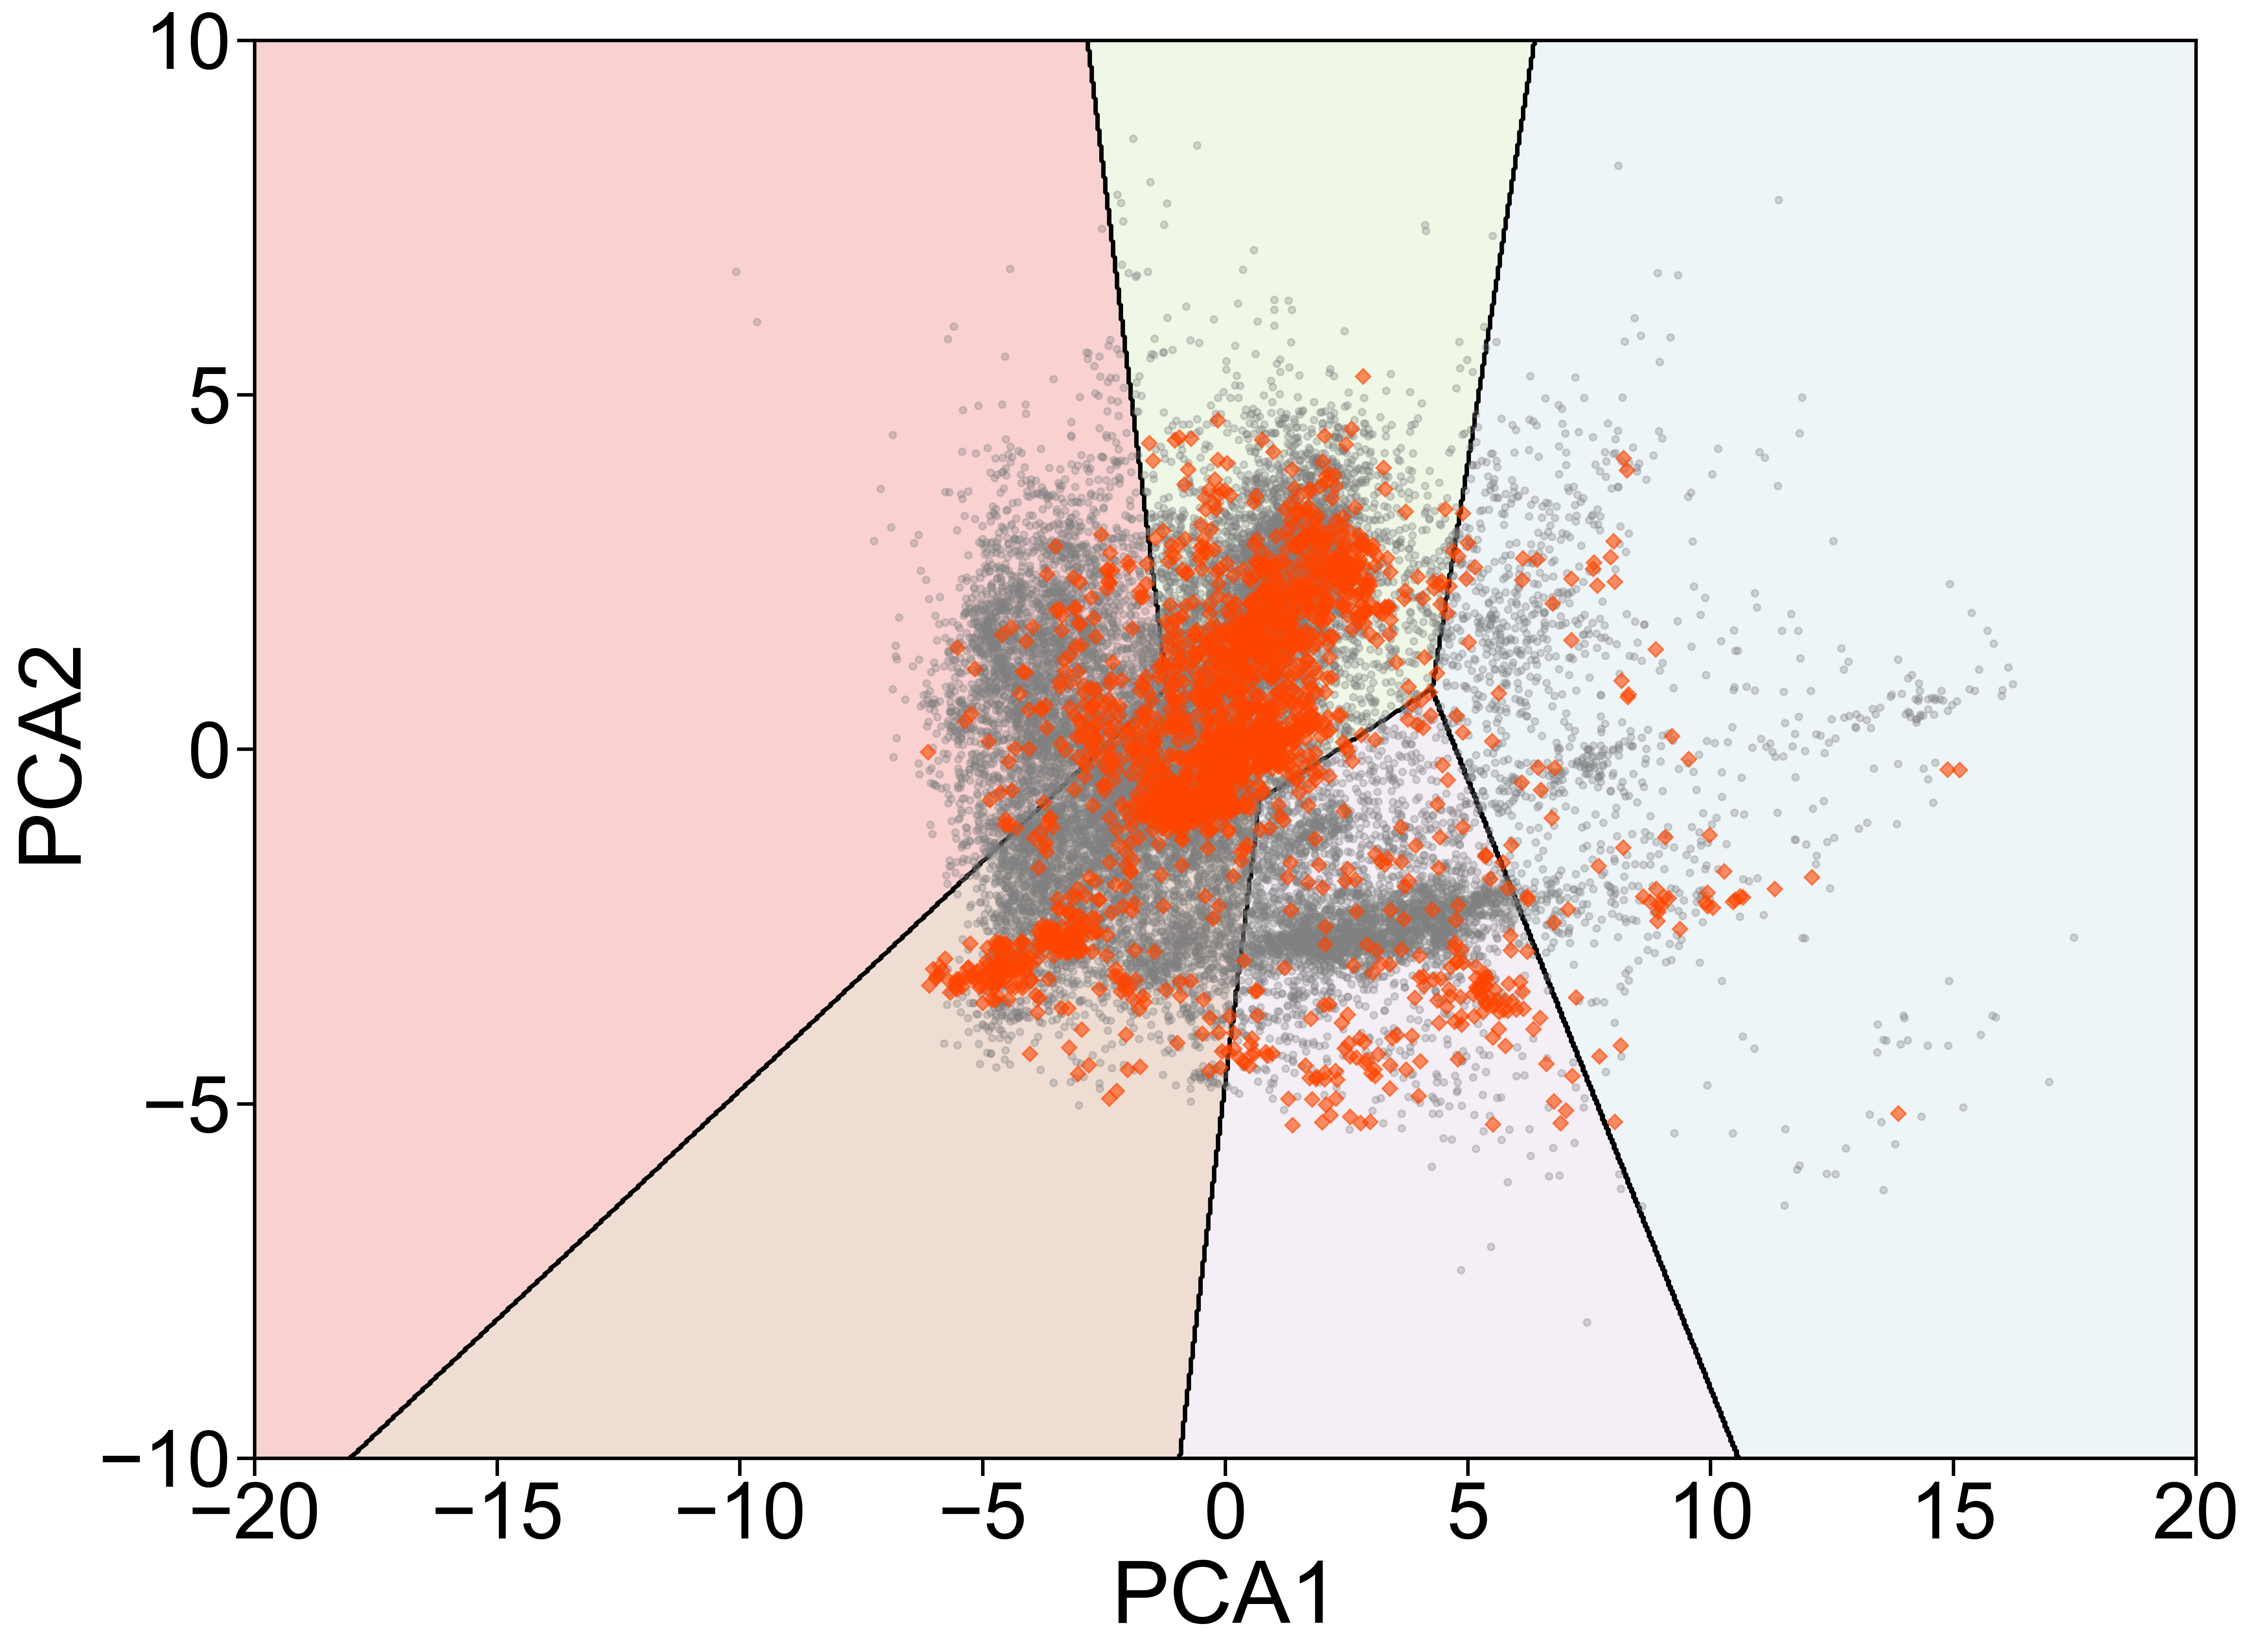

In [276]:
fig=plt.figure(figsize=(20, 15),dpi=300)
#plt.subplot(121)
#plot_decision_boundaried(kmeans1, reduced_data, tag=labels)
#plt.subplot(122)
plt.rcParams['font.sans-serif'] = 'Arial'
plot_decision_boundaried(kmeans2, reduced_data, tag=labels,show_centroids_labels=False)
plt.tick_params(axis='both',width=2,length=10, labelsize=45)
plt.xticks(np.linspace(-10,10,5,endpoint=True))
plt.yticks(np.linspace(-10,10,5,endpoint=True))
plt.rcParams["contour.linewidth"]=2
plt.ylabel('PCA2', fontsize=50, rotation=90)
plt.xlabel('PCA1', fontsize=50, rotation=0)
plt.xlim((-20, 20))
plt.ylim((-10, 10))
ax=plt.gca();
ax.spines['bottom'].set_linewidth(2);###
ax.spines['left'].set_linewidth(2);###
ax.spines['right'].set_linewidth(2);###
ax.spines['top'].set_linewidth(2);####

plt.show()
#fig.savefig('Figure6.eps',dpi=600,format='eps')

In [170]:
kmeans3 = KMeans(init="k-means++", n_clusters=3, n_init=3)
kmeans4 = KMeans(init="k-means++", n_clusters=4, n_init=3)
kmeans5 = KMeans(init="k-means++", n_clusters=5, n_init=3)
kmeans6 = KMeans(init="k-means++", n_clusters=6, n_init=3)

kmeans3.fit(reduced_data)
kmeans4.fit(reduced_data)
kmeans5.fit(reduced_data)
kmeans6.fit(reduced_data)

KMeans(n_clusters=6, n_init=3)

<ipython-input-167-f48be72e41ae>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0][real_tag=='L'], X[:, 1][real_tag=='L'],'.',


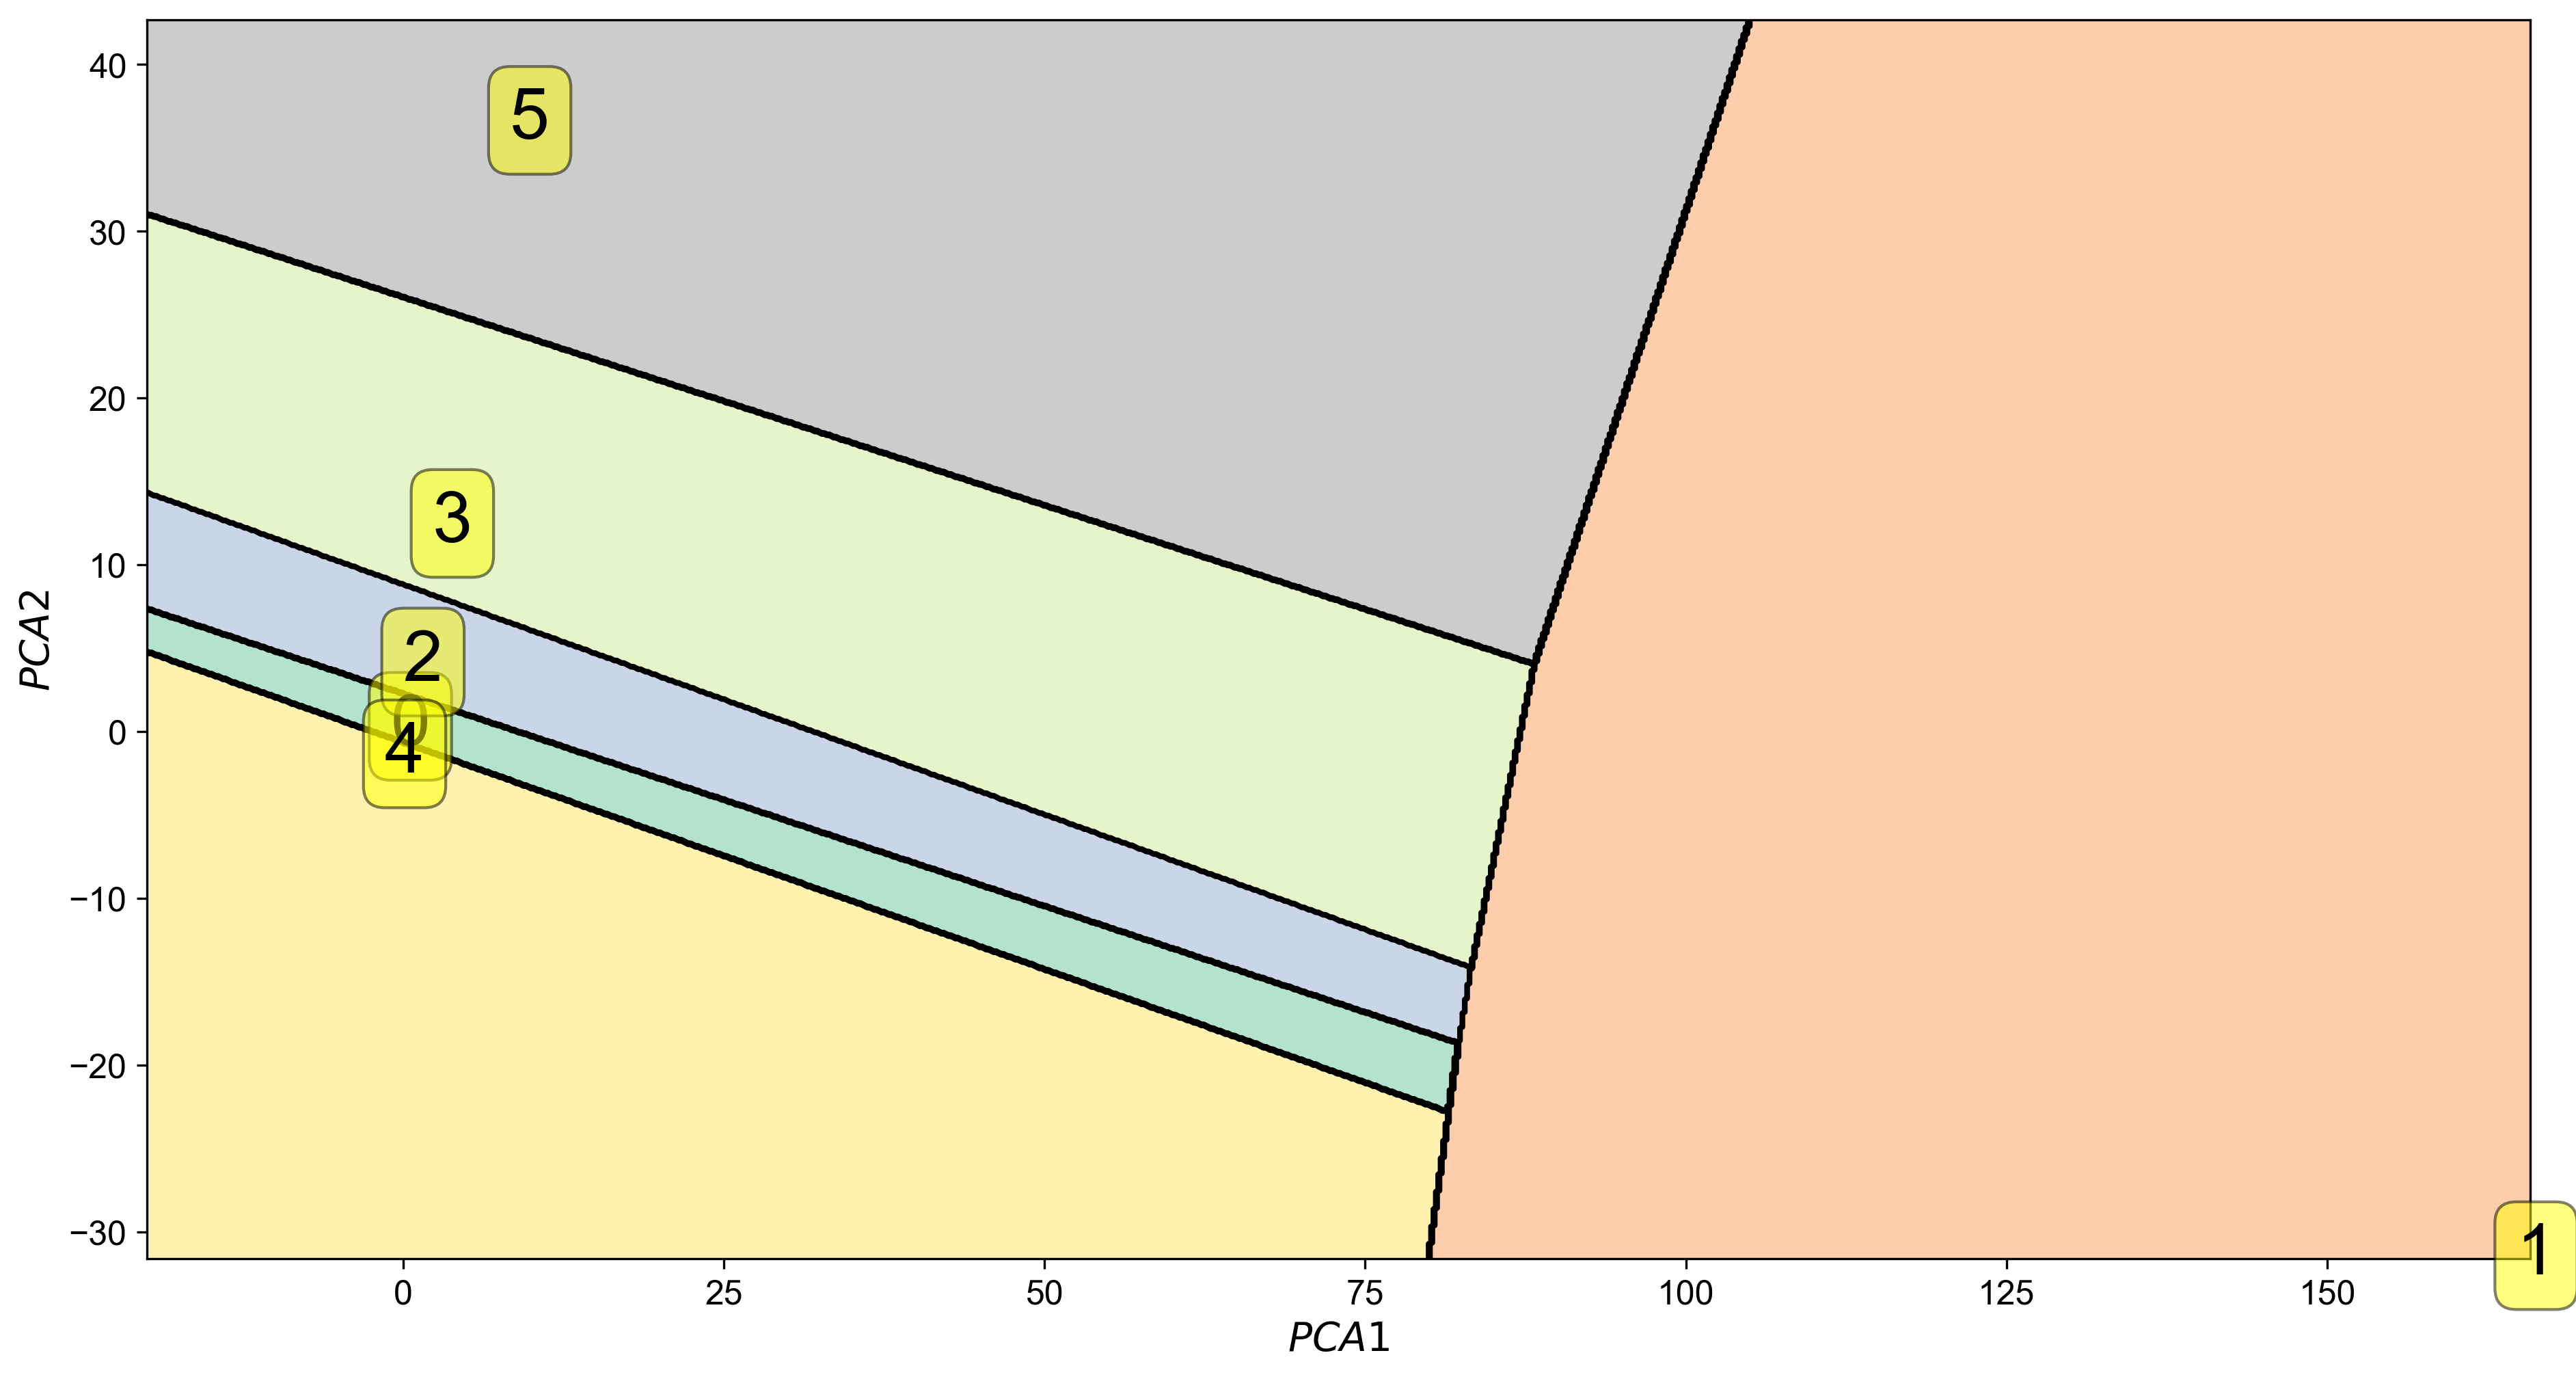

In [171]:
plt.figure(figsize=(15, 8),dpi=300)#
plot_decision_boundaried(kmeans6, reduced_data, show_centroids=False,show_centroids_labels=True)
plt.ylabel(r"$PCA2$", fontsize=14, rotation=90)
plt.xlabel(r"$PCA1$", fontsize=14, rotation=0)
plt.show()

<ipython-input-133-d8e291826518>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0][real_tag=='L'], X[:, 1][real_tag=='L'],'.',
<ipython-input-133-d8e291826518>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0][real_tag=='L'], X[:, 1][real_tag=='L'],'.',
<ipython-input-133-d8e291826518>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0][real_tag=='L'], X[:, 1][real_tag=='L'],'.',
<ipython-input-133-d8e291826518>:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(X[:, 0][real_tag

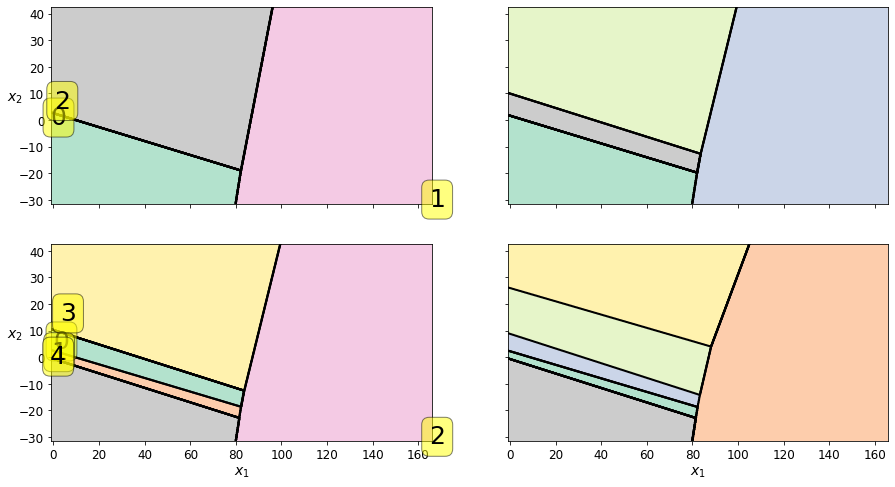

In [138]:
plt.figure(figsize=(15, 8))
plt.subplot(221)
plot_decision_boundaried(kmeans3, reduced_data, show_xlabels=False, show_centroids_labels=True)
plt.subplot(222)
plot_decision_boundaried(kmeans4, reduced_data, show_ylabels=False, show_xlabels=False)
plt.subplot(223)
plot_decision_boundaried(kmeans5, reduced_data, show_centroids_labels=True)
plt.subplot(224)
plot_decision_boundaried(kmeans6, reduced_data, show_ylabels=False)
#save_fig("reduced_and_cluster")
plt.show()